# **1. Importing Libraries**

In the following cell only the required libraries have been imported

In [270]:
import os
if not os.path.exists('visuals'):
    os.mkdir('visuals')
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

# **2. Exploring the Data**

In the following cells the data has been explored and transformed for further processing

## 2.1 Loading and preparing the data

The given dataset is a panel dataset that has in total 4 columns and 96 rows. The data contains information about the `Country`, the `Year` in which the data was collectd, the *Life expectancy at birth (year)* which has later been renamed to `Life_Expectancy` for ease of use, and it's `GDP` in that specific year.

In [251]:
data = pd.read_csv('all_data.csv')
# Column renamed for easier typing
data = data.rename(
    columns={'Life expectancy at birth (years)': 'Life_Expectancy'})
data['Country'] = data['Country'].replace('United States of America', 'USA')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [252]:
# GDP converted to billion
data['GDP'] = data['GDP']/10**9

In [253]:
data.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


## 2.2 Summarizing the data

The given datase has information spanning 16 years from 2000 to 2015 about six countries, namely:

1. Chile
2. China
3. Germany
4. Mexico
5. USA
6. Zimbabwe

The following table contains summarized information about the six countries

<center>

|<center>Country</center>|<center>Total GDP<br>(Billion USD)</center>|<center>Average Life Expectancy<br>(Years)</center>|<center>Correlation<br>(alpha = 5%)</center>|
|---|---|---|---|
|Chile|<center>2,716.63</center>|<center>78.95</center>|<center>0.95</center>|
|China|<center>79,323.42</center>|<center>74.26</center>|<center>0.91</center>|
|Germany|<center>49,516.41</center>|<center>79.66</center>|<center>0.93</center>|
|Mexico|<center>15,626.41</center>|<center>75.72</center>|<center>0.93</center>|
|USA|<center>2,25,200.00</center>|<center>78.06</center>|<center>0.98</center>|
|Zimbabwe|<center>145.00</center>|<center>50.09</center>|<center>0.97</center>|

</center>

***N.B**: Total GDP was calculated ignoring time value of money*

From the overview, it seems that there is a positive relationship between the GDP and life expectancy of the citizen's of a country.

In [254]:
data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [255]:
data['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

In [256]:
data.groupby('Country')['GDP'].sum()

Country
Chile         2716.621520
China        79323.420000
Germany      49516.410000
Mexico       15626.410000
USA         225200.000000
Zimbabwe       145.001274
Name: GDP, dtype: float64

In [257]:
data.groupby('Country')['Life_Expectancy'].mean()

Country
Chile       78.94375
China       74.26250
Germany     79.65625
Mexico      75.71875
USA         78.06250
Zimbabwe    50.09375
Name: Life_Expectancy, dtype: float64

In [271]:
for country in data['Country'].unique():
    dataset = data[data['Country'] == country]
    print(f'Country: {country}, Coefficient: {pearsonr(x=dataset['GDP'], y=dataset['Life_Expectancy'])}')

Country: Chile, Coefficient: PearsonRResult(statistic=0.9498766659254414, pvalue=1.865913974658588e-08)
Country: China, Coefficient: PearsonRResult(statistic=0.9085255408648358, pvalue=1.125098572070064e-06)
Country: Germany, Coefficient: PearsonRResult(statistic=0.932698898256127, pvalue=1.4018815534045607e-07)
Country: Mexico, Coefficient: PearsonRResult(statistic=0.9322377167847082, pvalue=1.4686960248304982e-07)
Country: USA, Coefficient: PearsonRResult(statistic=0.9817092382430257, pvalue=1.749970926909946e-11)
Country: Zimbabwe, Coefficient: PearsonRResult(statistic=0.9661998955858779, pvalue=1.2358516366845632e-09)


# 3. Visualizing the Data

This section of the analysis visualizes the data.

## 3.1 Univariate analysis

Individual variables are plotted to easily overview the data. The GDP growth as well as growth in life expectancy has been visualized in this section.

### 3.1.1 GDP Growth

Here the growth in GDP over time for each country has been shown.

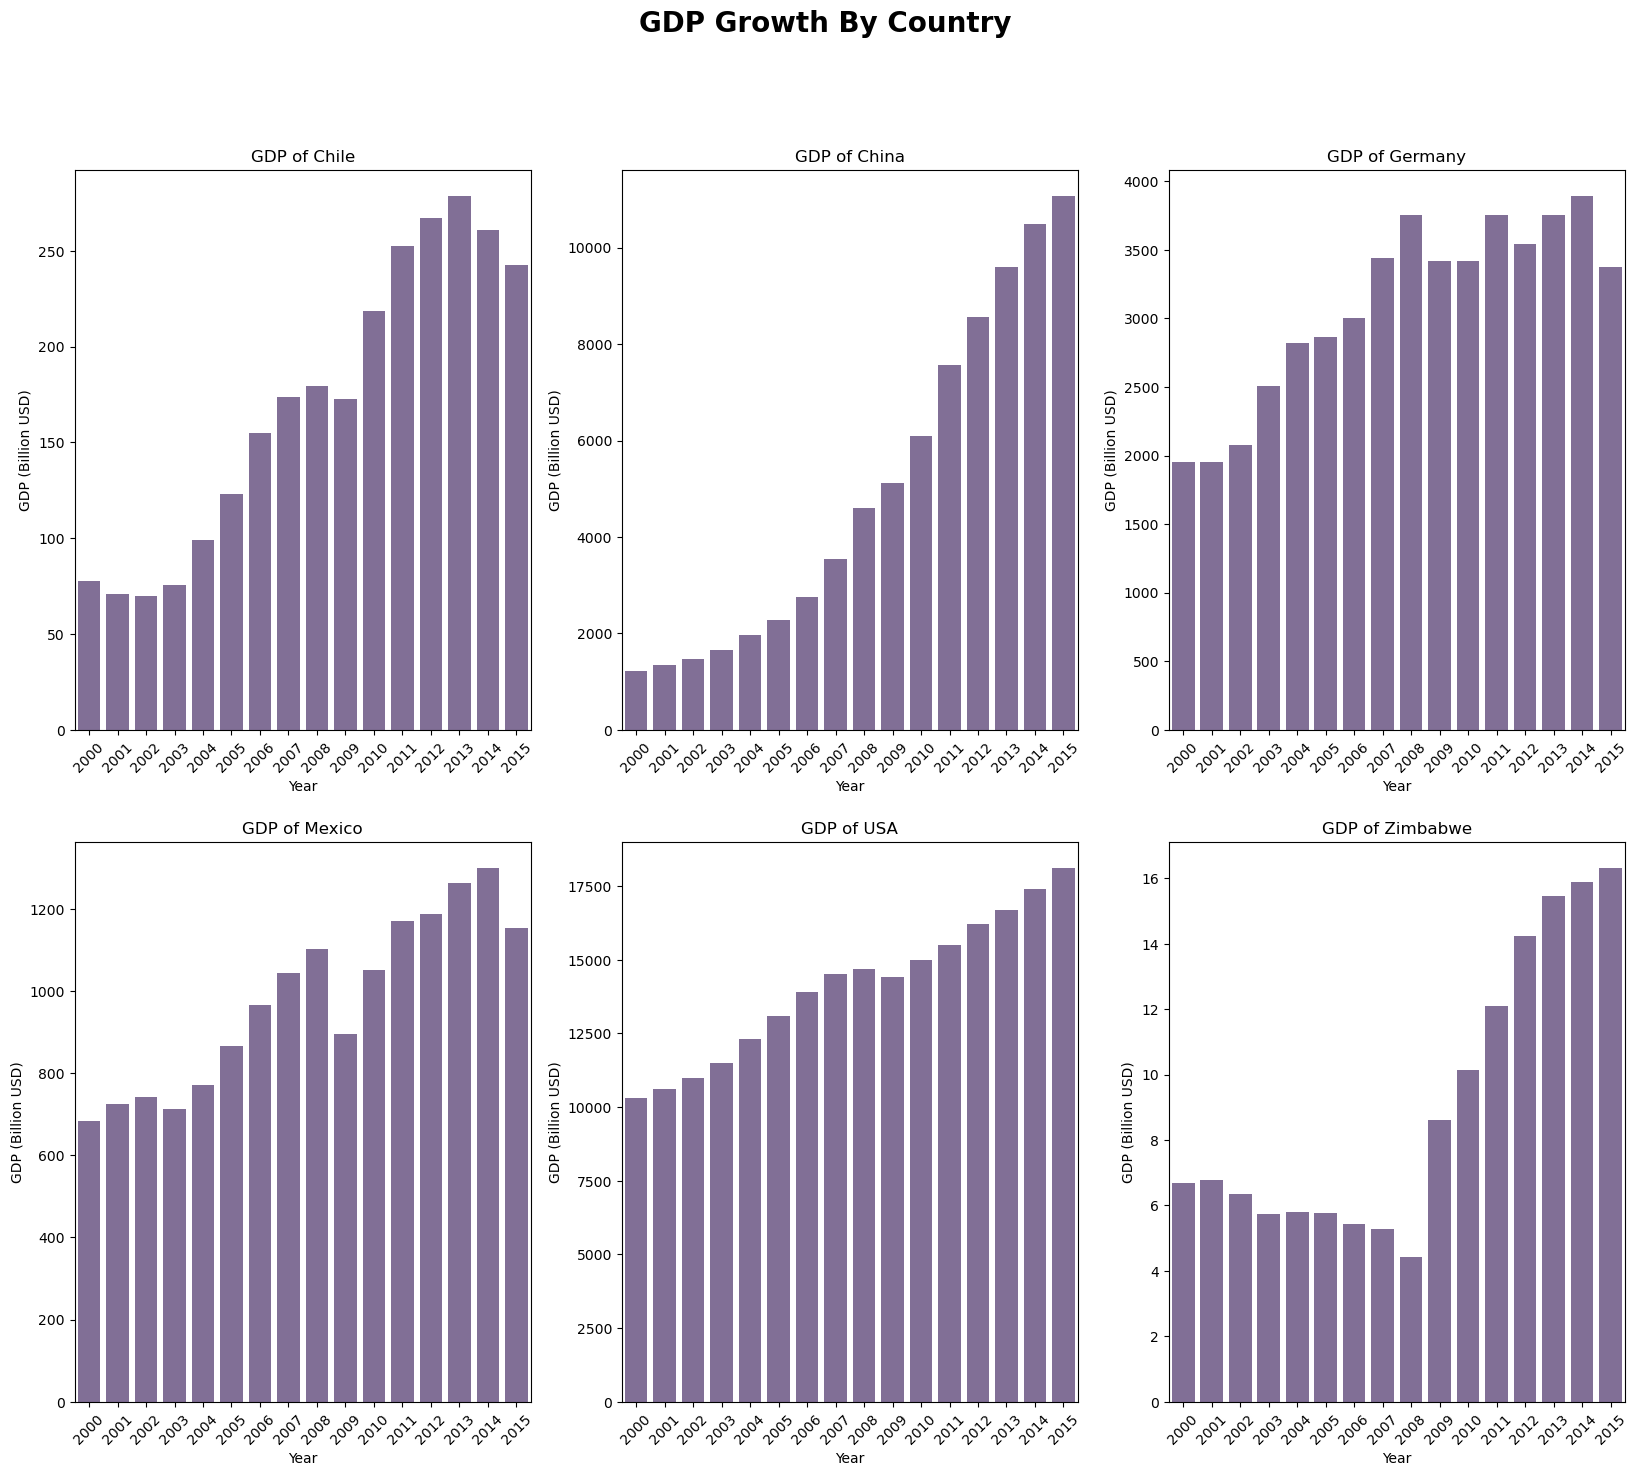

<Figure size 640x480 with 0 Axes>

In [258]:

fig = plt.figure(figsize=(20, 16))
fig.suptitle('GDP Growth By Country', weight='bold', size=20)
countries = data['Country'].unique()
for i in range(0, 6):
    country = countries[i]
    plt.subplot(2, 3, i+1)
    sns.barplot(data=data[data['Country'] == country], x='Year', y='GDP', color='#81689D')
    plt.title(f'GDP of {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP (Billion USD)')
    plt.xticks(rotation=45)

plt.savefig('visuals/gdp_growth.png')
plt.show()
plt.clf()

### 3.1.2 Life Expectancy Growth

Here the growth in GDP over time for each country has been shown.

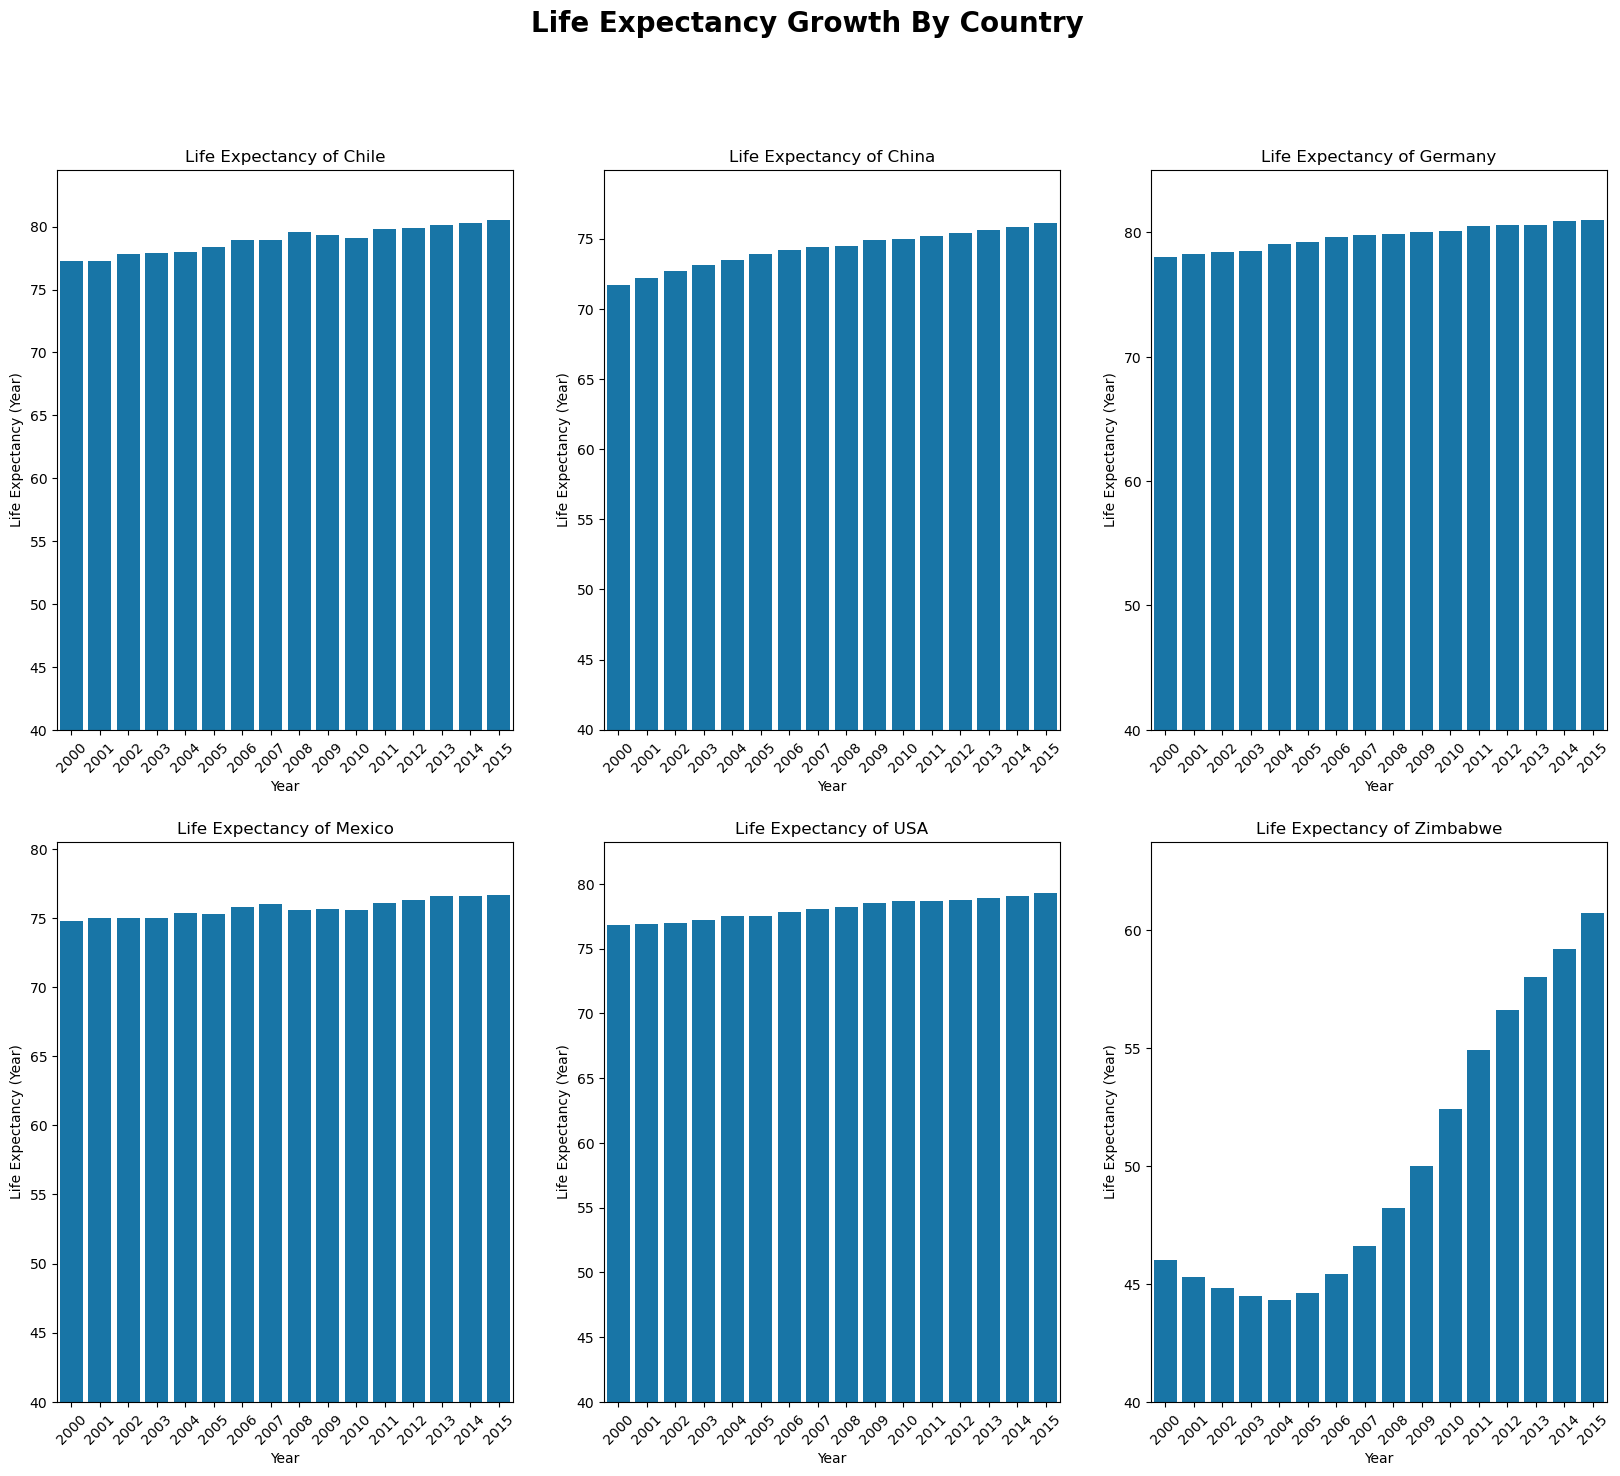

In [259]:
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Life Expectancy Growth By Country', weight='bold', size=20)
countries = data['Country'].unique()
for i in range(0, 6):
    country = countries[i]
    plt.subplot(2, 3, i+1)
    sns.barplot(data=data[data['Country'] == country], x='Year', y='Life_Expectancy', color='#007CBE')
    plt.title(f'Life Expectancy of {country}')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (Year)')
    plt.ylim(40, None)
    plt.xticks(rotation=45)

plt.savefig('visuals/life_growth.png')

## 3.2 Bivariate analysis

GDP and Life Expectancy are plotted to visualize the relationship between them. A side by side bar plot is used to show the growths individually whereas a regression plot is used to build a linear and non linear relationship between these variables.

### 3.2.1 Side by side bar plot

The side by side bar plot makes it easy to compare the growth in GDP and growth in life expectancy of each country. This is the first step to see if any relationship exists between these variables.

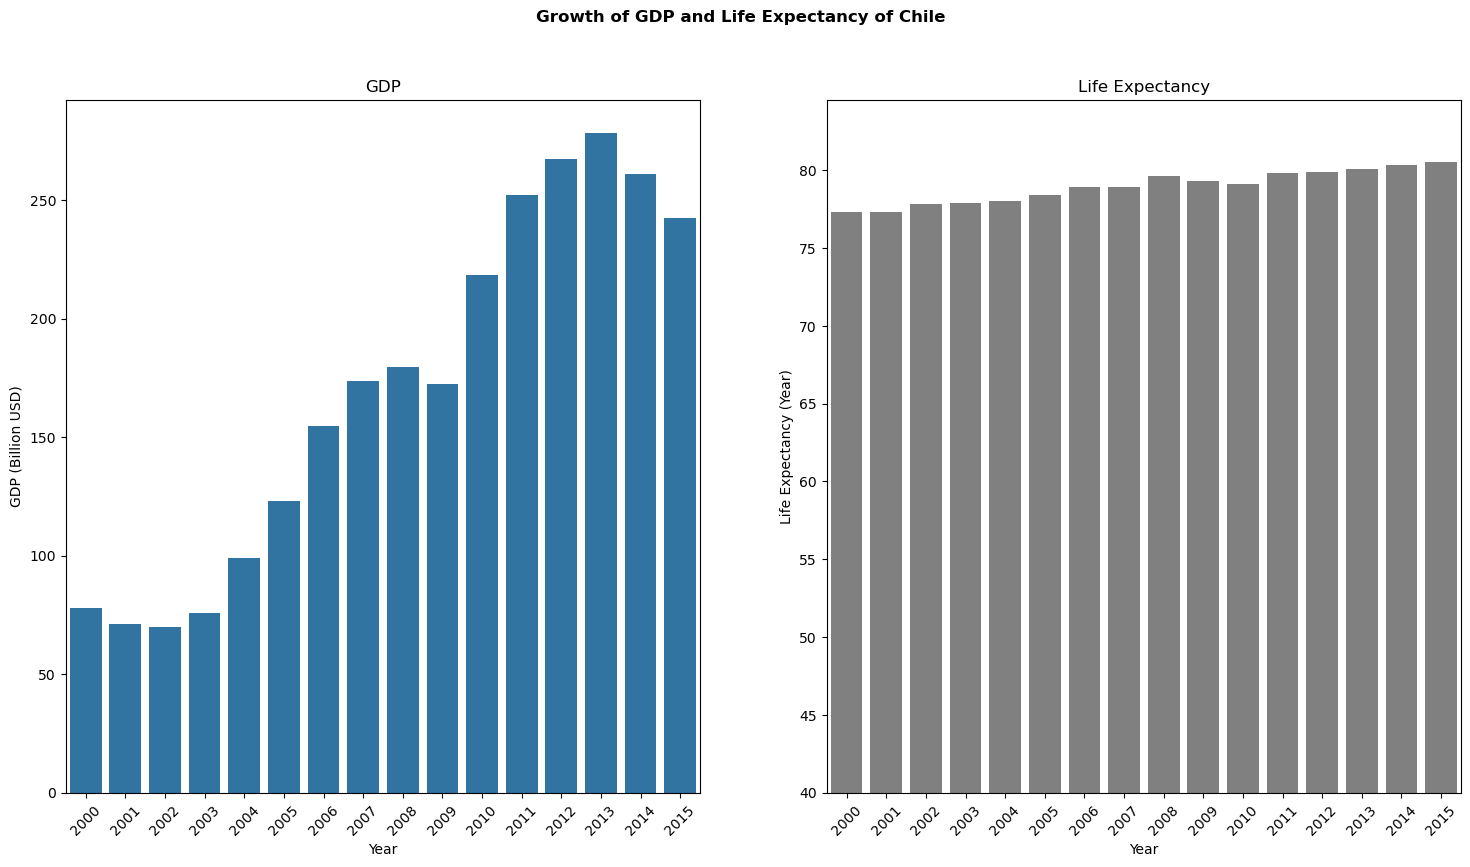

<Figure size 640x480 with 0 Axes>

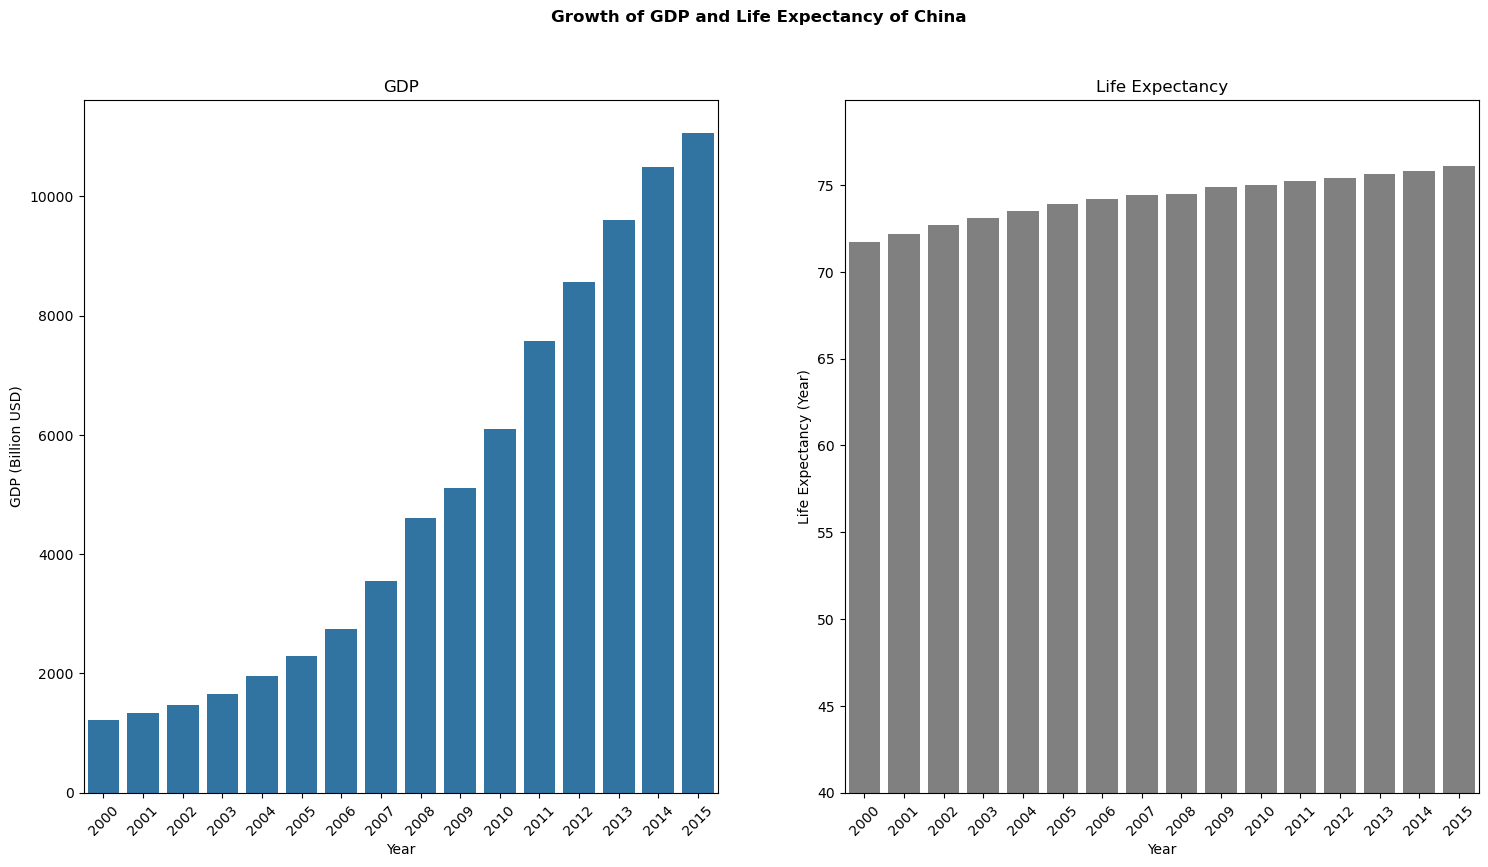

<Figure size 640x480 with 0 Axes>

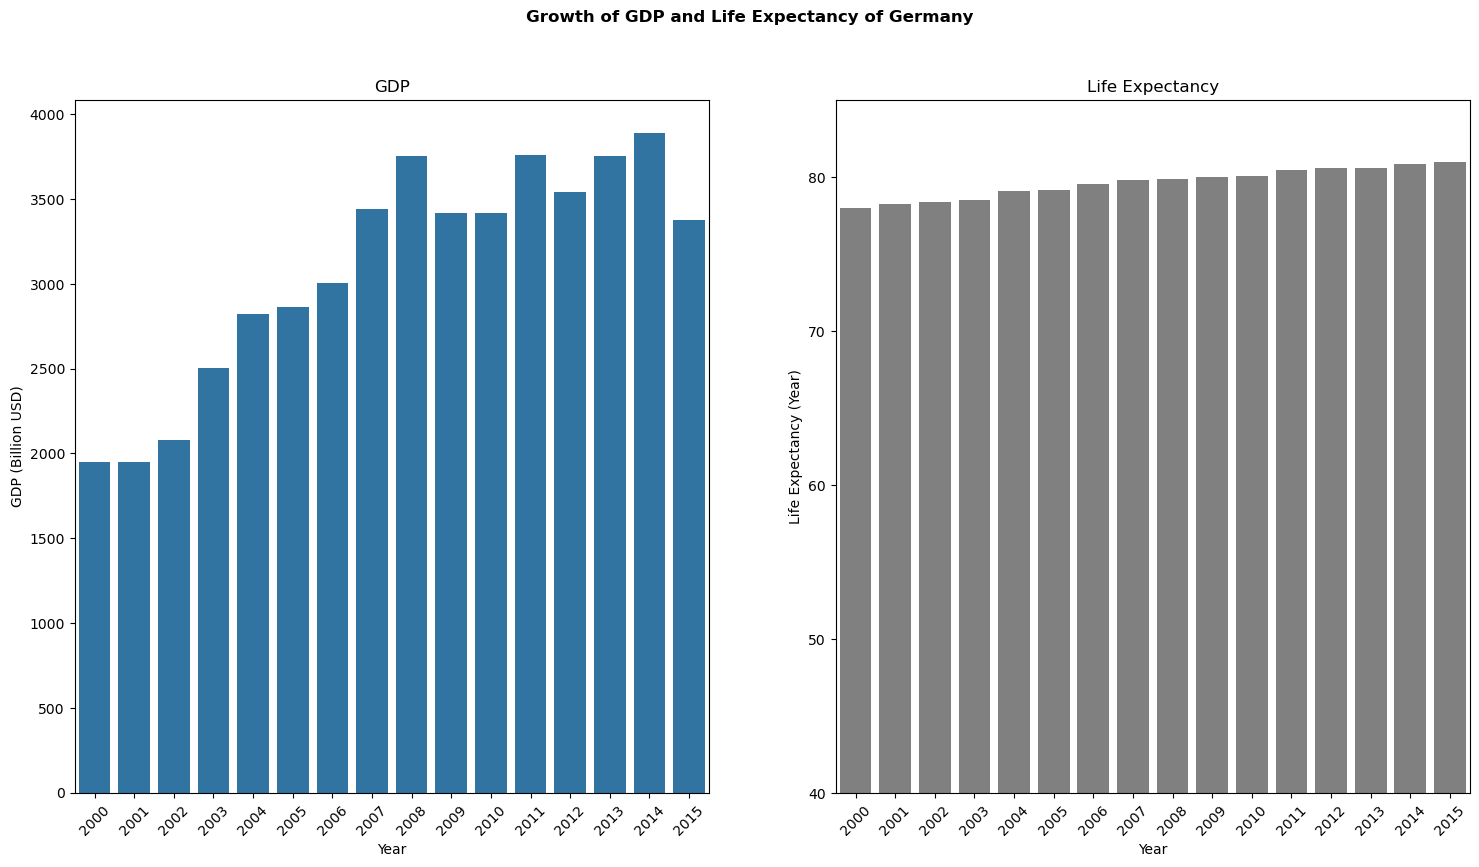

<Figure size 640x480 with 0 Axes>

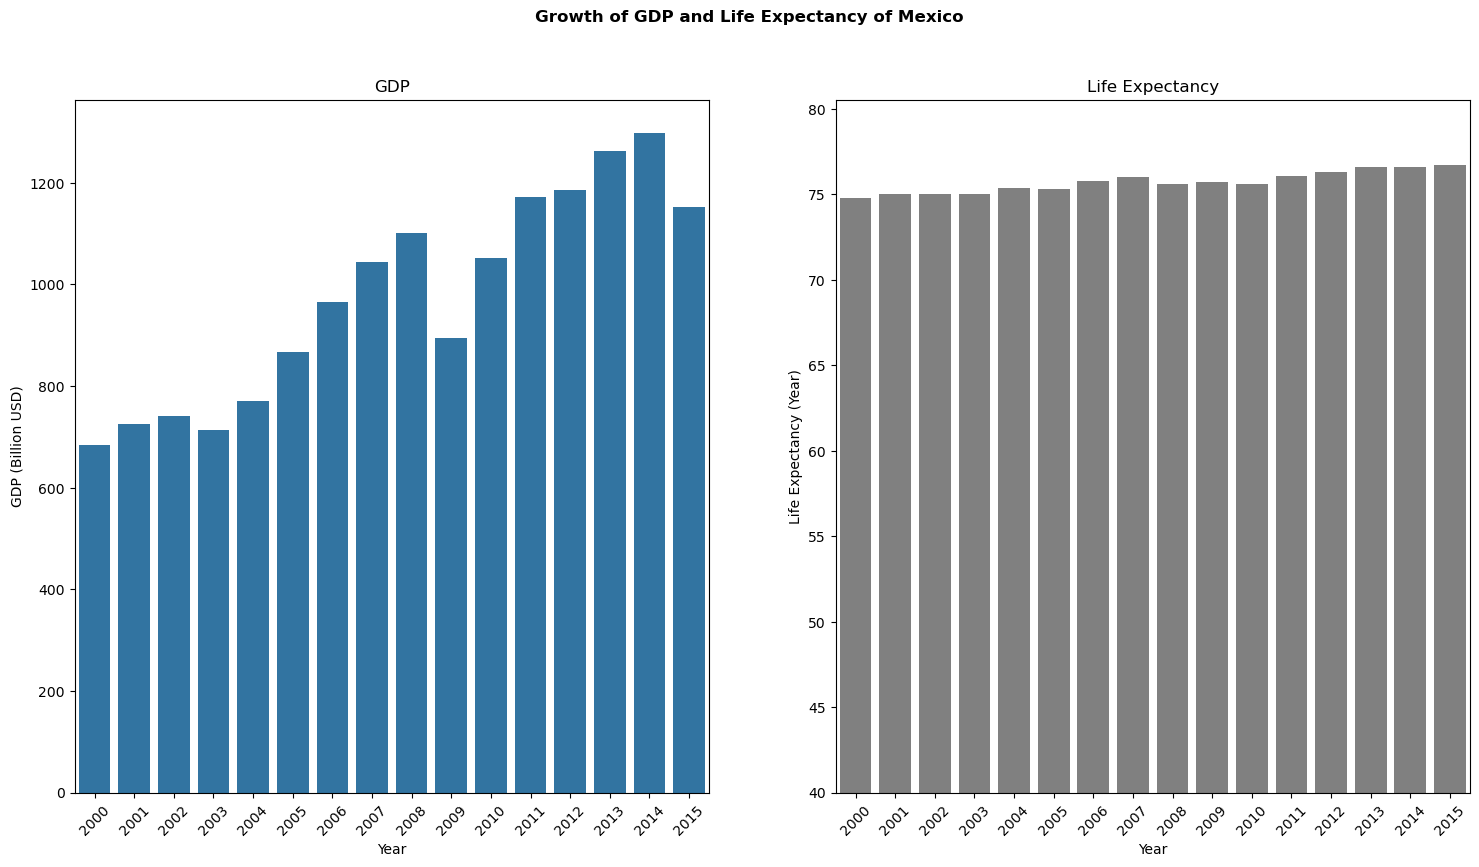

<Figure size 640x480 with 0 Axes>

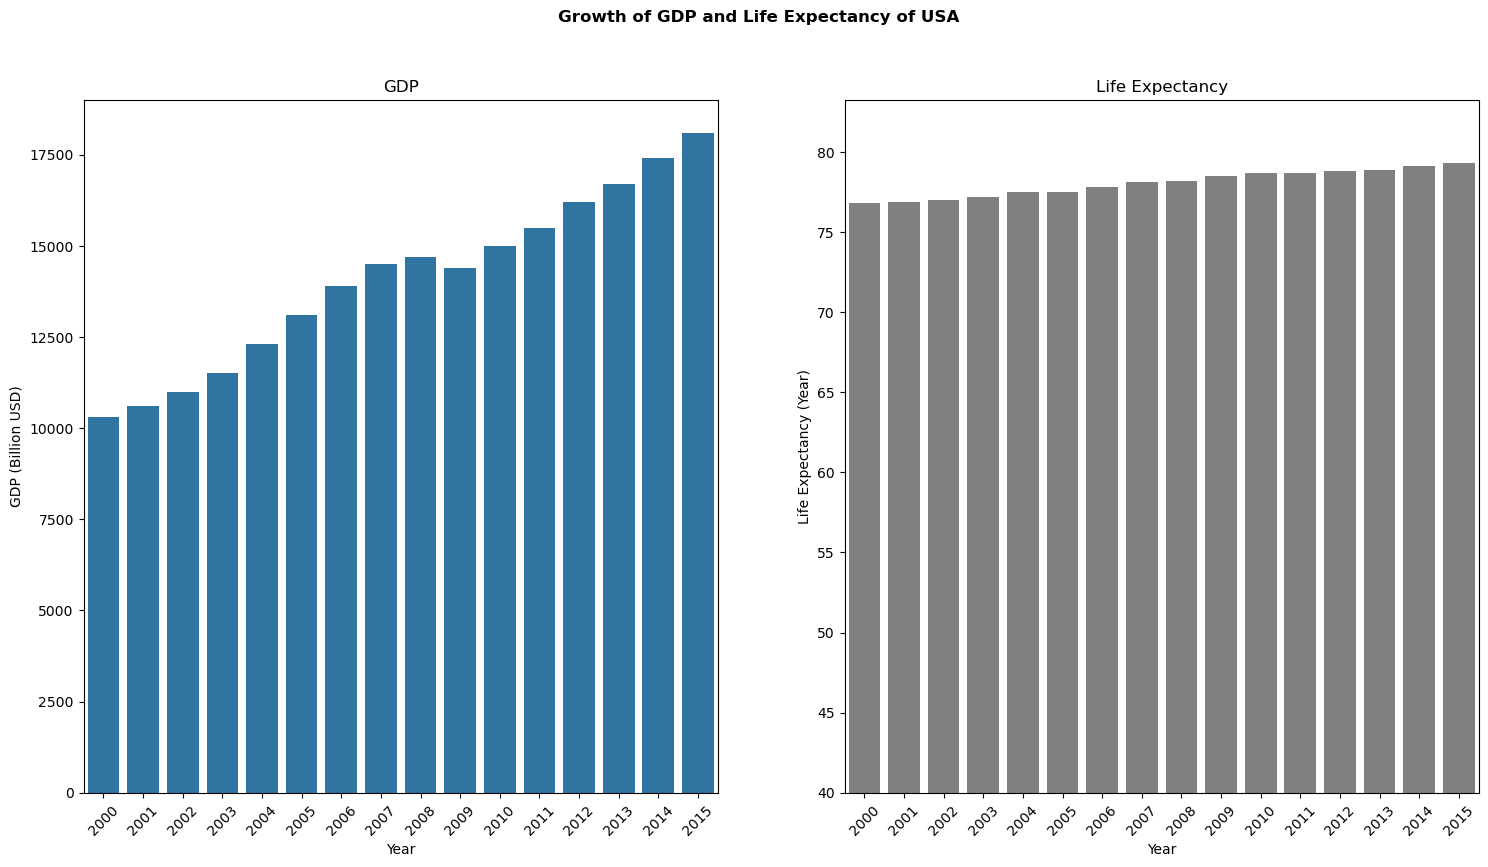

<Figure size 640x480 with 0 Axes>

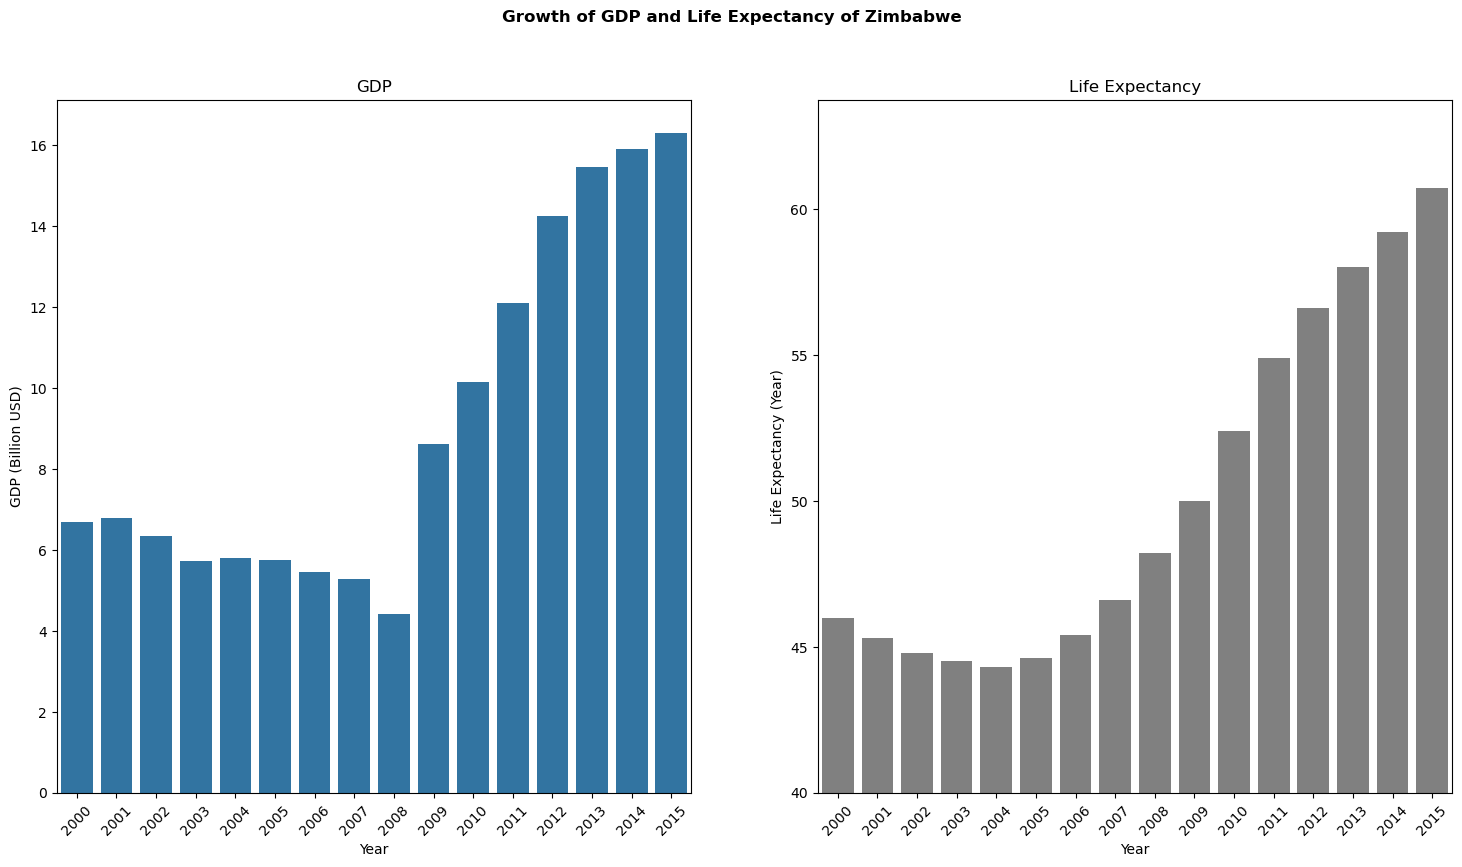

<Figure size 640x480 with 0 Axes>

In [278]:
for country in countries:
    figure = plt.figure(figsize=(18, 9))
    figure.suptitle(f'Growth of GDP and Life Expectancy of {country}', weight='bold')
    # Bar plot of GDP
    plt.subplot(1, 2, 1)
    sns.barplot(data=data[data['Country'] == country], x='Year', y='GDP')
    plt.title(f'GDP')
    plt.xlabel('Year')
    plt.ylabel('GDP (Billion USD)')
    plt.xticks(rotation=45)
    # Barplot of Life Expectancy
    plt.subplot(1, 2, 2)
    sns.barplot(data=data[data['Country'] == country],
                x='Year', y='Life_Expectancy', color='grey')
    plt.title(f'Life Expectancy')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (Year)')
    plt.ylim(40, None)
    plt.xticks(rotation=45)
    plt.savefig(f'visuals/gdp_le_{country}.png')
    plt.show()
    plt.clf()

### 3.2.2 Scatter plot with regression line

A scatter plot shows the relationship between two variables. Adding a regrassion line gives a visual representation of the strength and direction of the relationship between these variables.

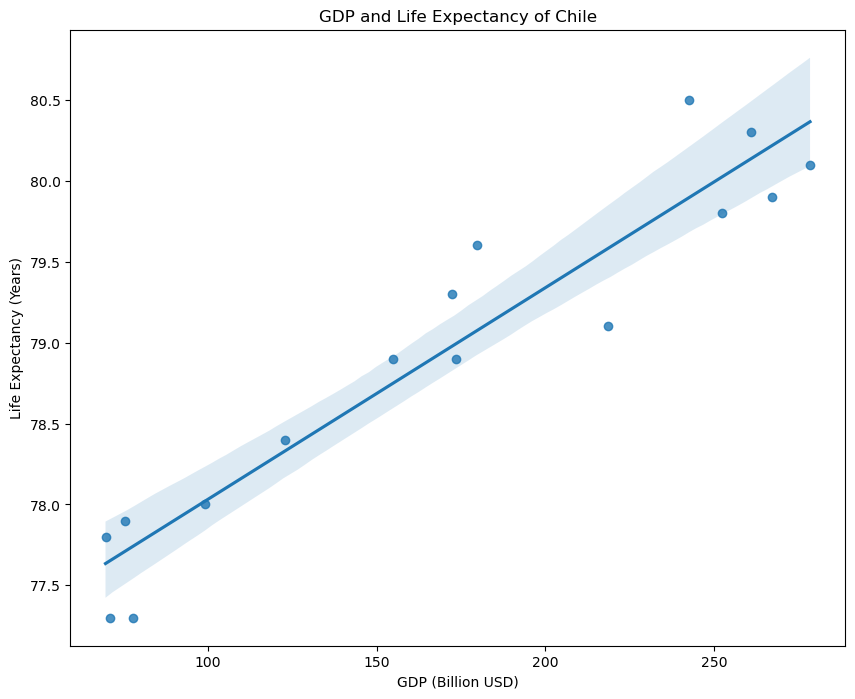

<Figure size 640x480 with 0 Axes>

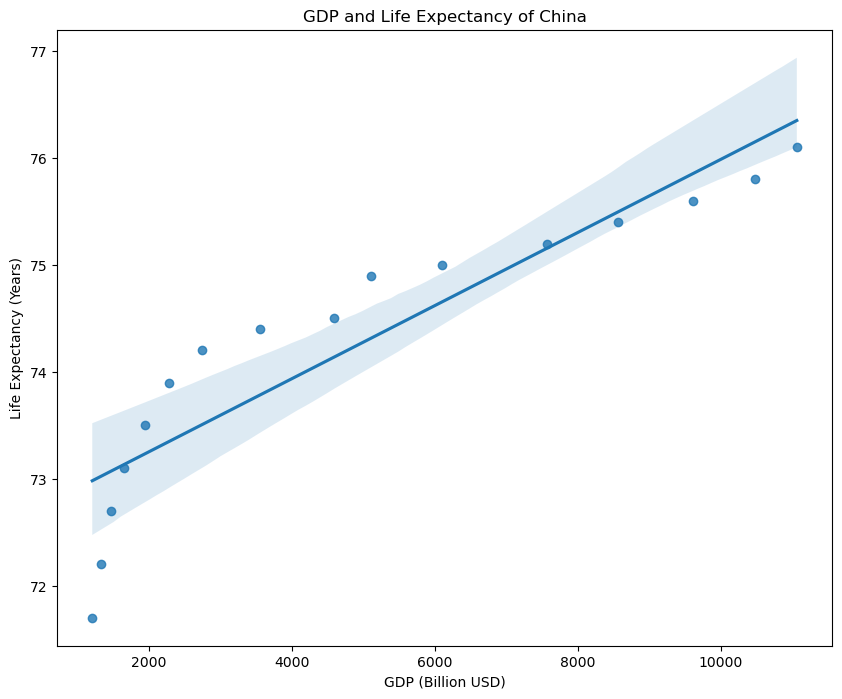

<Figure size 640x480 with 0 Axes>

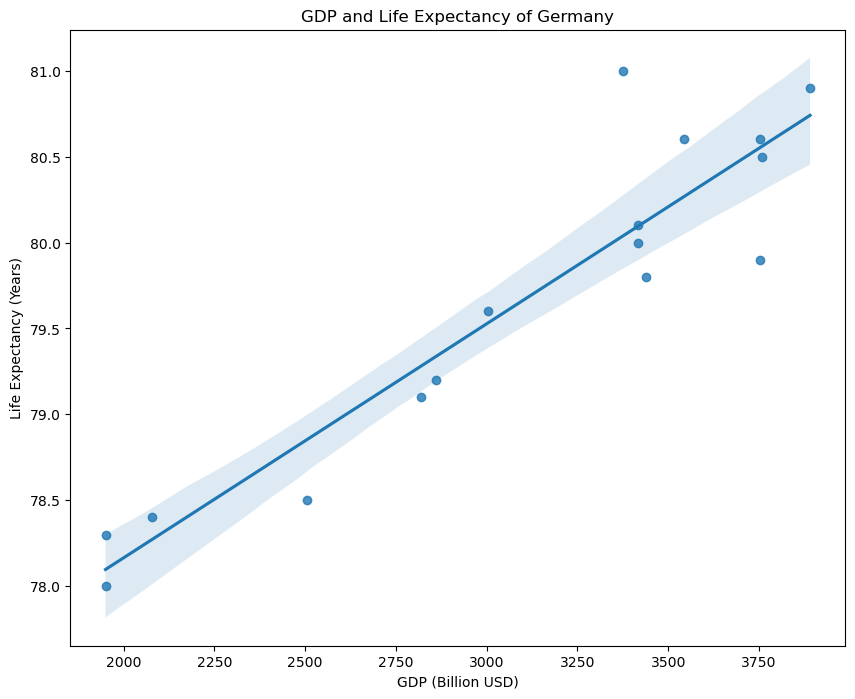

<Figure size 640x480 with 0 Axes>

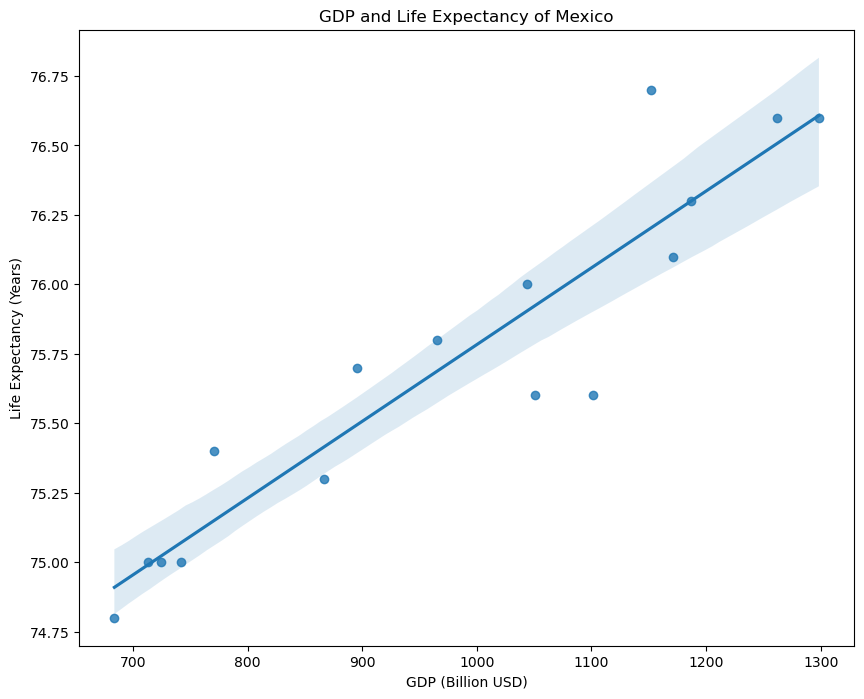

<Figure size 640x480 with 0 Axes>

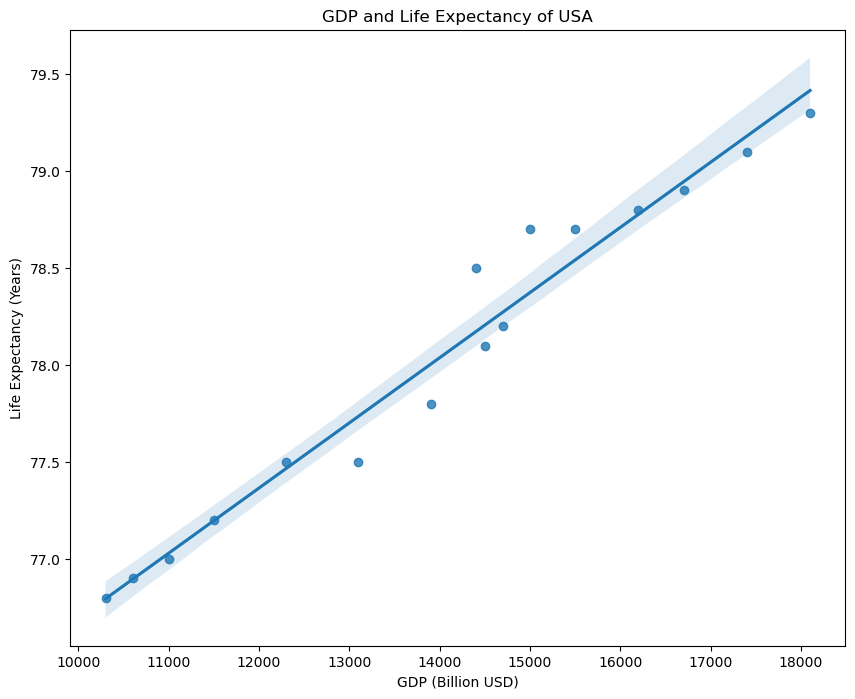

<Figure size 640x480 with 0 Axes>

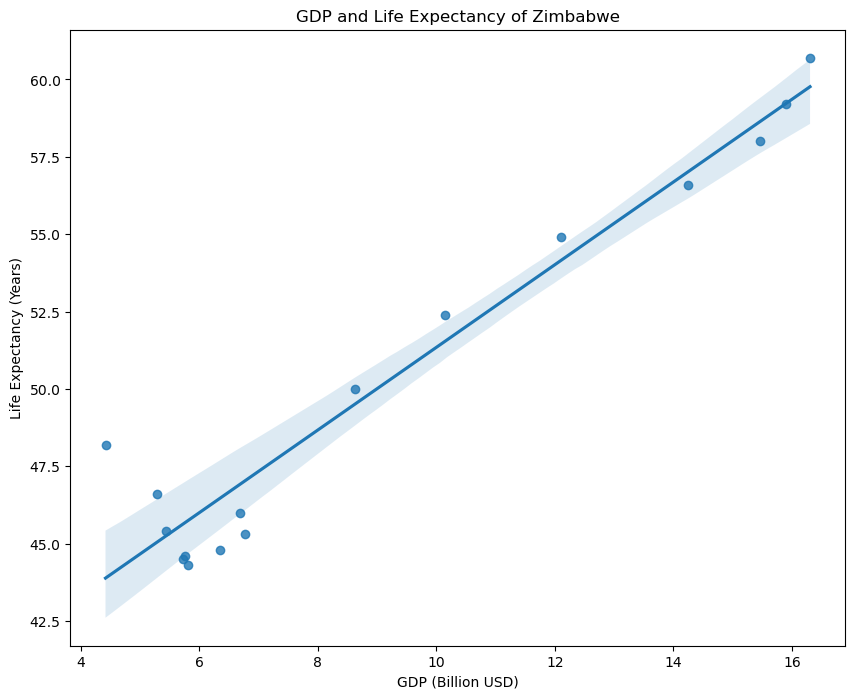

<Figure size 640x480 with 0 Axes>

In [276]:
for country in countries:
    plt.figure(figsize=(10, 8))
    sns.regplot(
        data=data[data['Country'] == country], x='GDP', y='Life_Expectancy')
    plt.title(f'GDP and Life Expectancy of {country}')
    plt.xlabel('GDP (Billion USD)')
    plt.ylabel('Life Expectancy (Years)')
    plt.savefig(f'visuals/scatter_{country}.png')
    plt.show()
    plt.clf()